In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

sns.set(rc={"figure.dpi":300})
plt.rcParams["font.family"] = "Times New Roman"

In [2]:
student_data = pd.read_csv('./student_data.csv')
class_data = pd.read_csv('./class_data.csv')
numeric_vars = ['PMH', 'SWLS', 'NEI', 'PEI', 'shs', 'sssc', 'sfsc', 'drink', 'friends', 'sleep']

C:\Users\12576\AppData\Local\Temp\ipykernel_34340\1786987857.py:1: DtypeWarning: Columns (63) have mixed types. Specify dtype option on import or set low_memory=False.
  student_data = pd.read_csv('./student_data.csv')


### graph evidence

Text(70, -1.2, '(b)')

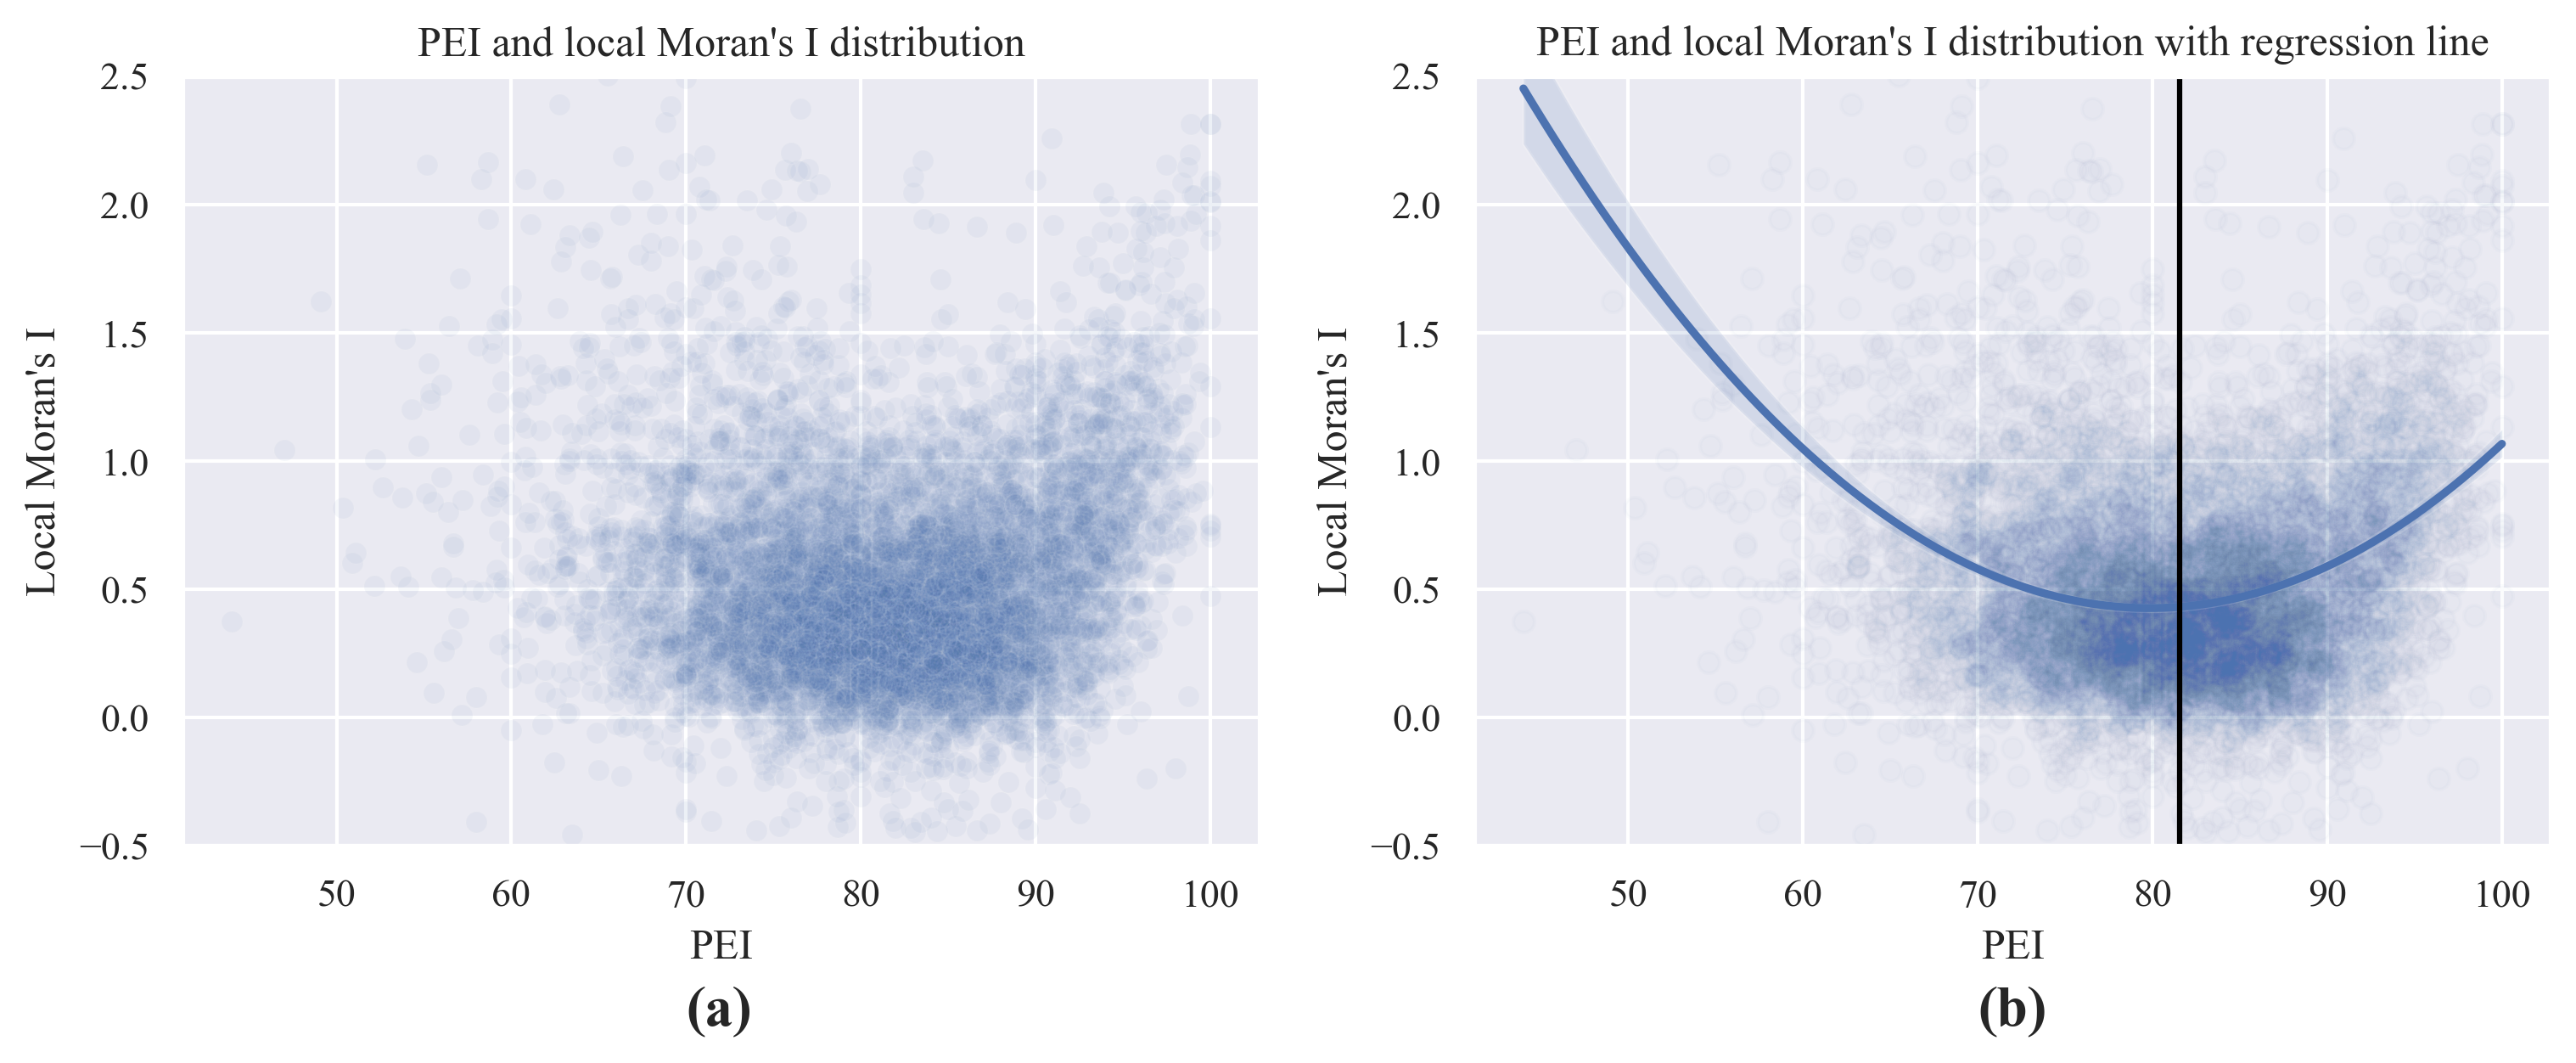

In [5]:
x = 'PEI'
y_range = [-0.5, 2.5]
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 4))
sns.scatterplot(data=class_data, x=x, y='local_moran', alpha=0.05, ax=ax0)
ax0.set_ylim(-0.5, 2.5)
# ax0.set_xlim(40, 100)
ax0.set_title(f'{x} and local Moran\'s I distribution')
ax0.set_ylabel('Local Moran\'s I')

sns.regplot(data=class_data, x=x, y='local_moran', scatter_kws={'alpha':0.02}, order=2, ax=ax1)
ax1.plot([class_data[x].mean(), class_data[x].mean()], y_range, c='#000000')
ax1.set_ylim(-0.5, 2.5)
# ax1.set_xlim(40, 100)
ax1.set_title(f'{x} and local Moran\'s I distribution with regression line')
ax1.set_ylabel('Local Moran\'s I')

ax0.text(70, -1.2, '(a)', size=16, weight='bold')
ax1.text(70, -1.2, '(b)', size=16, weight='bold')

### calculation evidence

In [6]:
num_degrees = 8
linear_loss = pd.DataFrame(columns=numeric_vars, index=np.arange(num_degrees)+1)

y = class_data['local_moran'].to_numpy()
for var in numeric_vars:
    x = class_data[var].to_numpy()
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
    for i in range(1, num_degrees+1):
        poly = PolynomialFeatures(degree=i, include_bias=False)
        train_features = poly.fit_transform(x_train.reshape(-1, 1))
        reg_model = LinearRegression()
        reg_model.fit(train_features, y_train)
        test_features = poly.fit_transform(x_test.reshape(-1, 1))
        y_pred = reg_model.predict(test_features)
        loss = y_pred - y_test

        linear_loss.loc[i, var] = np.abs(loss).sum()

linear_loss

,PMH,SWLS,NEI,PEI,shs,sssc,sfsc,drink,friends,sleep
1,1305.153082,1323.684026,1306.028314,1333.264995,1333.053676,1333.241555,1307.503193,1293.859196,1349.555422,1294.637765
2,1248.734078,1271.05406,1207.19942,1247.432052,1304.056705,1323.556514,1313.910308,1264.751447,1348.029516,1287.242712
3,1251.850022,1271.766114,1201.90612,1231.136212,1303.962147,1325.196707,1323.35362,1260.415994,1349.091226,1284.001293
4,1259.942331,1269.07114,1203.224137,1230.721403,1303.65234,1324.497183,1317.299187,1259.235013,1349.619407,1280.829028
5,1292.426063,1266.946038,1203.134467,1231.398689,1304.04039,1319.940239,1324.050901,1260.479334,1349.198418,1278.668329
6,1383.363723,1265.710696,1202.839861,1231.096786,1304.118416,1321.989215,1317.083606,1261.352074,1349.284086,1277.824782
7,2564.004885,1265.476861,1203.093837,1231.50191,1304.332948,1322.056289,1328.822347,1261.594861,1348.953458,1278.133579
8,4289.926593,1265.671033,1202.079625,1231.016,1304.435193,1321.791842,1317.037992,1262.018585,1351.19465,1278.10936


(0.0, 9.0)

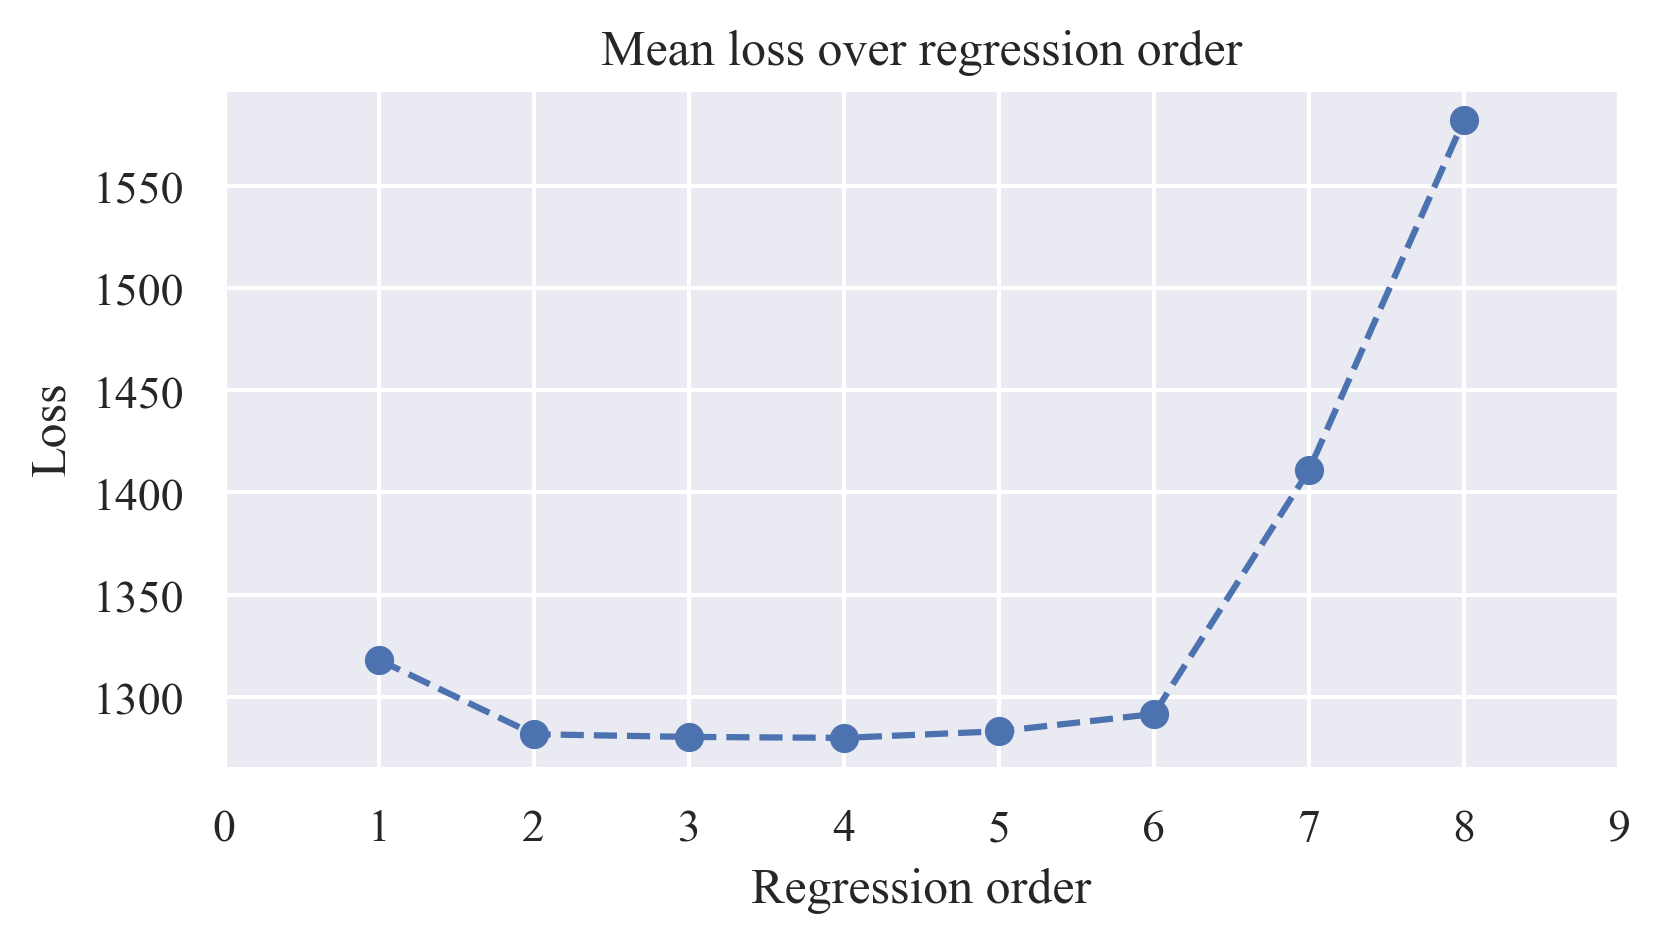

In [8]:
plt.figure(figsize=(6, 3))
plt.plot(linear_loss.mean(axis=1), marker='o', linestyle='--')
plt.xlabel('Regression order')
plt.ylabel('Loss')
plt.title('Mean loss over regression order')
plt.xlim(0, 9)

### get coefficient

In [9]:
def standardize(df):
    return (df - df.min()) / (df.max() - df.min())

curve_df = pd.DataFrame(columns=numeric_vars, index=['coe', 'loss'])

y = standardize(class_data['local_moran']).to_numpy()
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_reg_model = LinearRegression()
for var in numeric_vars:
    x = standardize(class_data[var]).to_numpy()
    poly_features = poly.fit_transform(x.reshape(-1, 1))
    poly_reg_model.fit(poly_features, y)
    y_pred = poly_reg_model.predict(poly_features)

    print(poly_reg_model.coef_)

    curve_df.loc['coe', var] = poly_reg_model.coef_[1]
    curve_df.loc['loss', var] = np.abs(y_pred - y).sum()

[-0.91087417  0.7741731 ]
[-0.71519067  0.62561169]
[-0.35920207  0.50339763]
[-0.44609689  0.34846234]
[-0.2745928   0.27748922]
[-0.23642024  0.26879248]
[-0.15687539  0.17892655]
[-0.11231826  0.1738493 ]
[-0.16641794  0.14504313]
[-0.08170204  0.07557275]


In [10]:
curve_df.T['coe'].sort_values(ascending=False)

PMH        0.774173
SWLS       0.625612
NEI        0.503398
PEI        0.348462
shs        0.277489
sssc       0.268792
sfsc       0.178927
drink      0.173849
friends    0.145043
sleep      0.075573
Name: coe, dtype: object

### graph moran VS feature

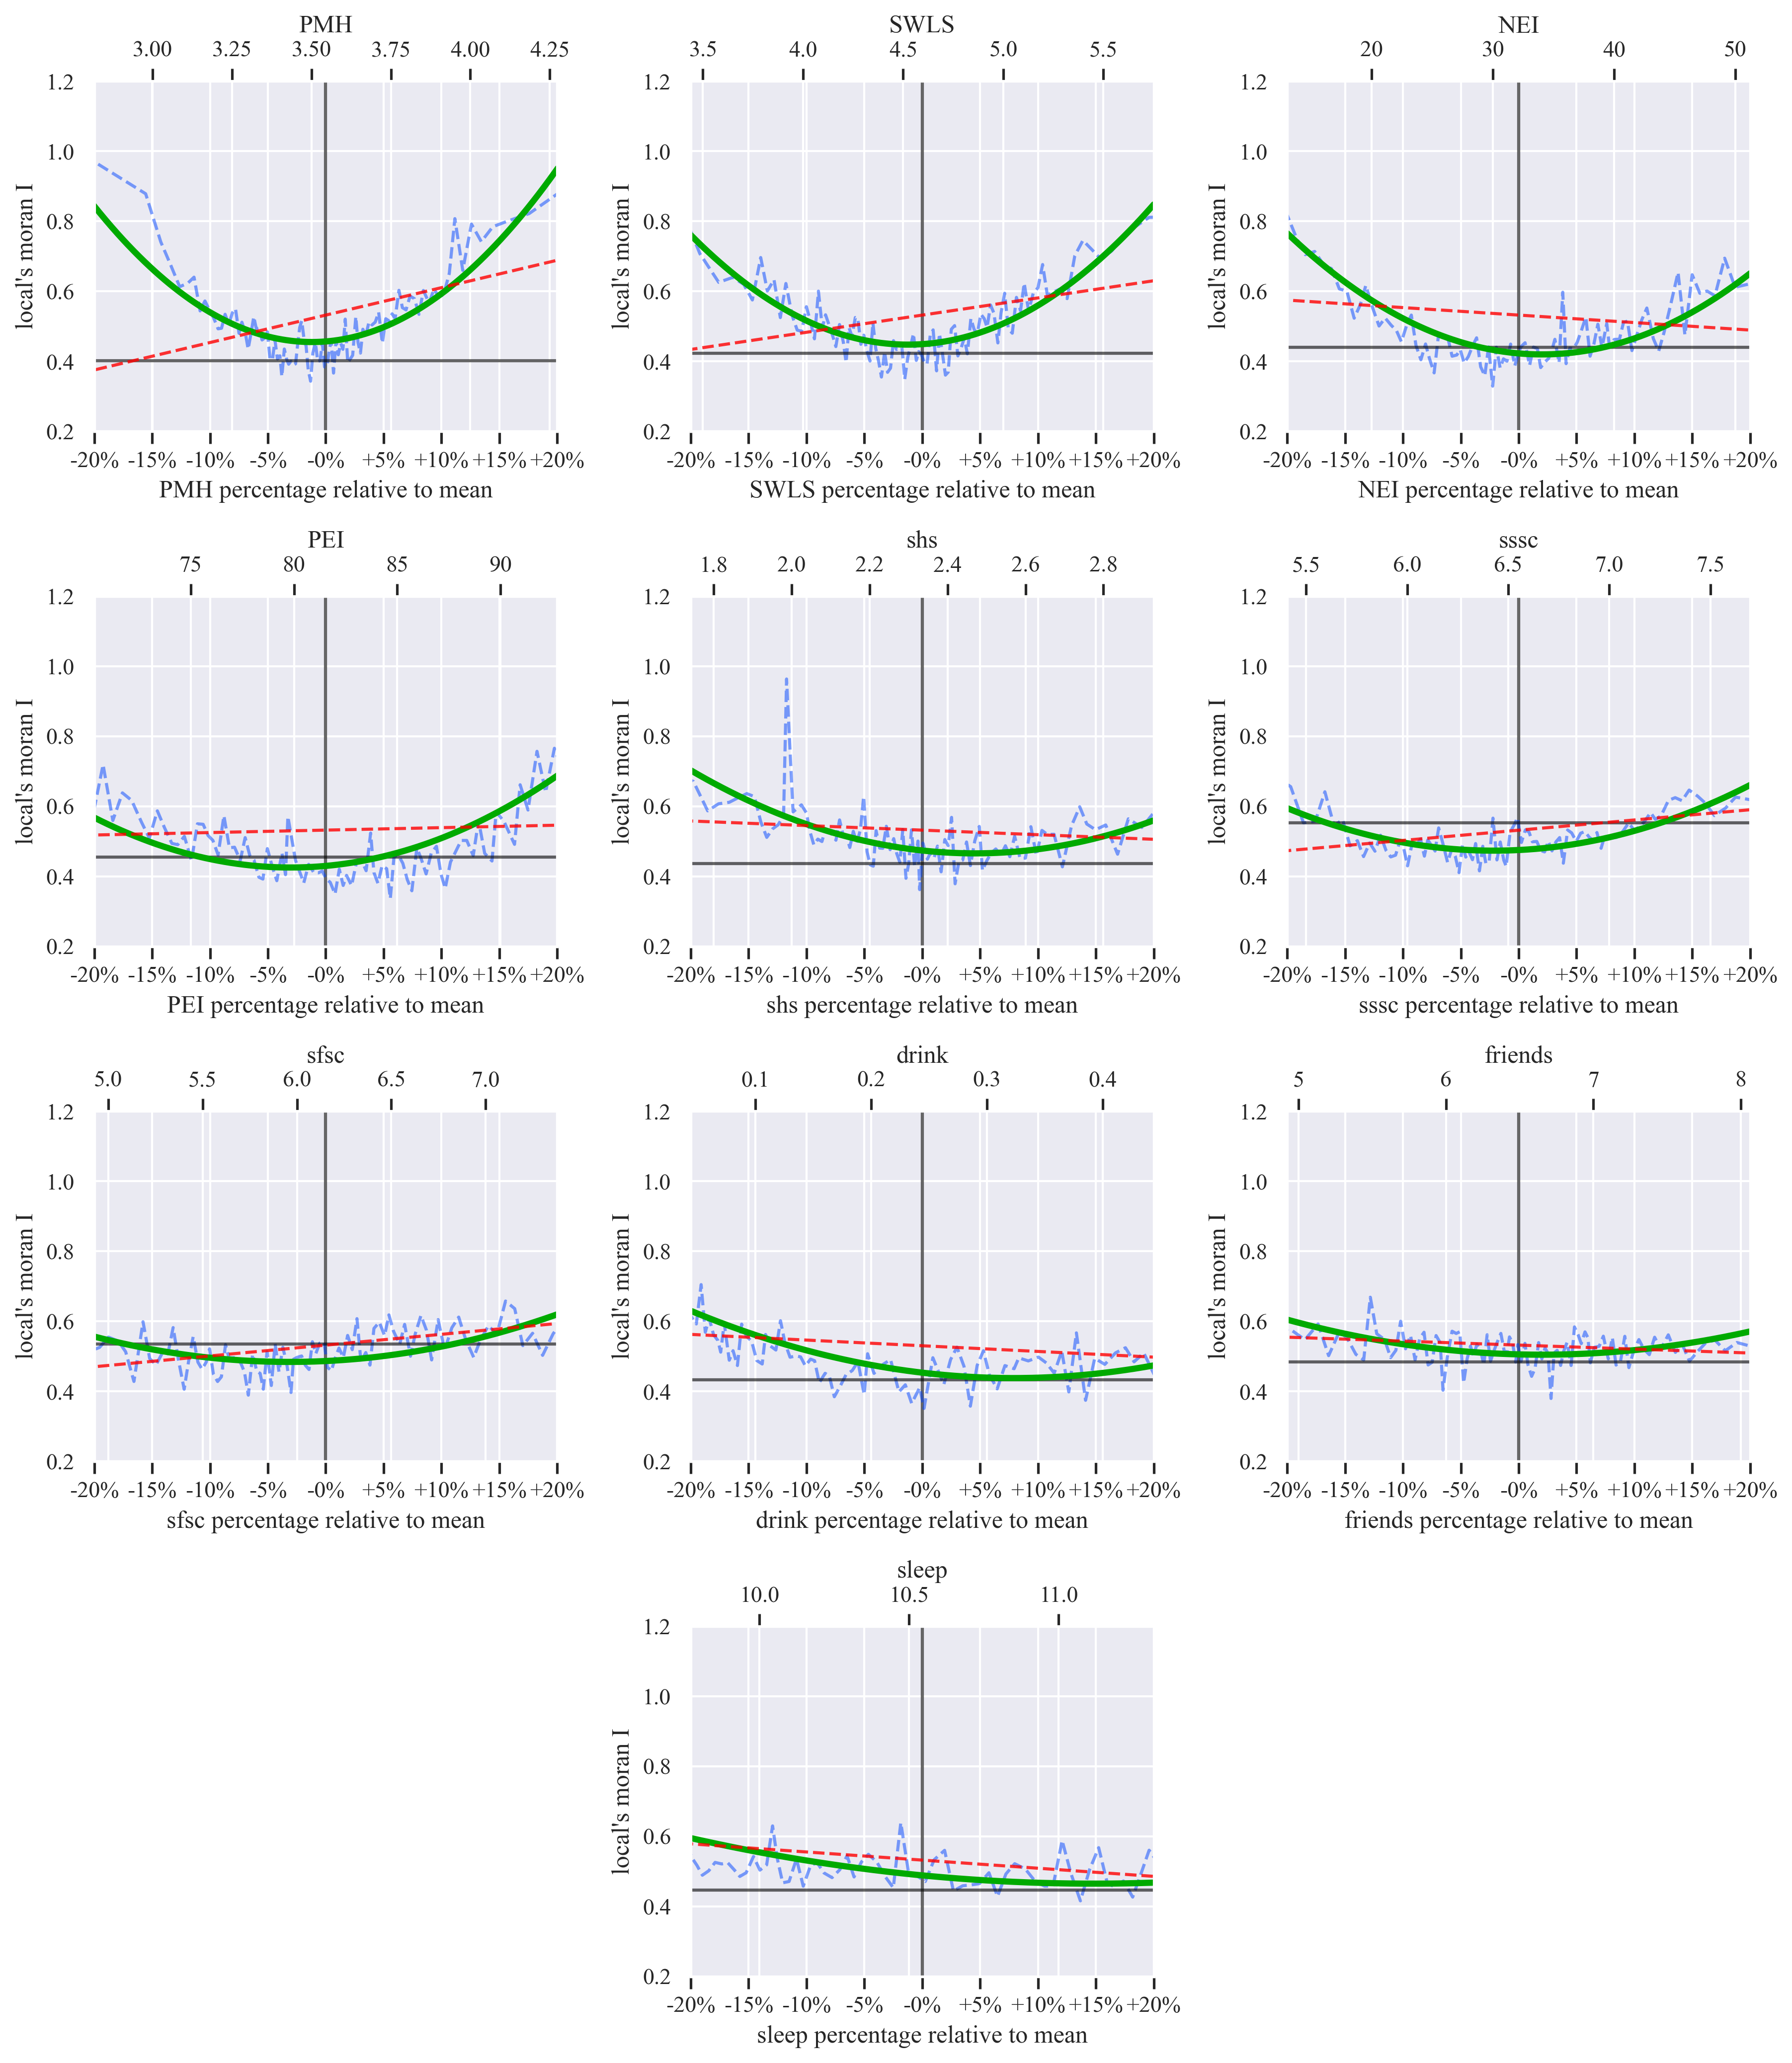

In [12]:
import matplotlib.gridspec as gridspec
from scipy.interpolate import interp1d

fig = plt.figure(figsize=(14, 14))
gs = gridspec.GridSpec(4, 7)

reg_model = LinearRegression()
for i in range(10):
    var = numeric_vars[i]
    
    if i < 3:
        ax = plt.subplot(gs[0, 2*i:2*i+2])
    elif i < 6:
        ax = plt.subplot(gs[1, 2*(i-3):2*(i-3)+2])
    elif i < 9:
        ax = plt.subplot(gs[2, 2*(i-6):2*(i-6)+2])
    else:
        ax = plt.subplot(gs[3, 2*(i-9)+2:2*(i-9)+4])


    bins=100
    bin_space = 1 / bins
    y_percent = 0.05
    var_values = []
    var_morans = []

    for i in range(bins):
        start = class_data[var].quantile(i * bin_space)
        end =  class_data[var].quantile((i+1) * bin_space)
        sample = class_data[(class_data[var] >= start) & (class_data[var] < end)]
        var_values.append(sample[var].mean())
        var_morans.append(sample['local_moran'].mean())

    var_values = np.asarray(var_values)
    var_values = var_values[~np.isnan(var_values)]
    var_morans = np.asarray(var_morans)
    var_morans = var_morans[~np.isnan(var_morans)]

    x_percent = 0.2
    x_mean = var_values.mean()
    x_range = class_data[var].max() - class_data[var].min()
    xlim = [x_mean - x_percent * x_range, x_mean + x_percent * x_range]

    f = interp1d(np.append(var_values[0::10], var_values[-1]), np.append(var_morans[0::10], var_morans[-1]), kind='cubic')

    moran_min = min(var_morans)
    moran_range = class_data['local_moran'].max() - class_data['local_moran'].min()
    ylim = [moran_min - y_percent * 0.25 * moran_range, moran_min + y_percent * moran_range]
    ylim = [0.2, 1.2]

    # ax2 = ax.add_subplot(111)
    ax2 = ax
    ax1 = ax2.twiny()

    ax1.plot(var_values, var_morans, color='#0044ff', linestyle='--', alpha=0.5)
    # ax1.plot(var_values[1:], f(var_values[1:]), color='#0044ff')
    ax2.plot([0.5, 0.5], ylim, c='black', alpha=0.6)
    ax1.plot(xlim, [f(x_mean), f(x_mean)], c='black', alpha=0.6)
    plt.xlabel(var)
    ax2.set_ylabel('local\'s moran I')


    #fit parabola
    poly = PolynomialFeatures(degree=2, include_bias=False)
    sorted = class_data.sort_values(by=[var])
    x = sorted[var].to_numpy()
    y = sorted['local_moran'].to_numpy()
    poly_features = poly.fit_transform(x.reshape(-1, 1))
    reg_model.fit(poly_features, y)
    dummy = np.arange(x.min(), x.max(), (x.max() - x.min()) / 1000)
    preds = reg_model.predict(poly_features)
    ax1.plot(x, preds, color='#00aa00', linestyle='-', linewidth=3)
    #fit linear
    reg_model = LinearRegression()
    reg_model.fit(class_data[var].to_numpy().reshape(-1,1), class_data['local_moran'].to_numpy())
    x = np.asarray([class_data[var].sort_values().iloc[0], class_data[var].sort_values().iloc[-1]])
    preds = reg_model.predict(x.reshape(-1, 1))
    ax1.plot(x, preds, color='#ff0000', linestyle='--', alpha=0.8)

    # ax2.set_xticklabels(np.arange(-x_percent, x_percent, (x_percent / 3)))
    ax2.set_xticks(np.arange(0, 1.001, 1/8))
    ax2.set_xticklabels(['{0:+,.0%}'.format(x) for x in np.arange(-x_percent, x_percent + 0.001, (x_percent / 4))])
    ax2.set_xlabel(var + ' percentage relative to mean')
    ax1.set_ylim(ylim)
    ax1.set_xlim(xlim)

    i += 1
    
plt.tight_layout()
plt.show()